# Deep Learning Assignment 3: CNN for MNIST Classification


**Tasks Covered**:
1. Download and preprocess data + train/test split
2. Implement CNN model with convolutional, pooling, and fully connected layers
3. Train model with appropriate loss functions and optimizers
4. Evaluate model with accuracy, precision, recall, and F1-score
5. Experiment with different hyperparameters

## 1. Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


d:\BSCS 5th Semester\Deep Learning & Neural Networks\DeepLearning_assignment_3\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## 2. Download and Preprocess Data

In [2]:
# Download MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10


In [3]:
# Data preprocessing
def preprocess_data(x_train, x_test, y_train, y_test):
    """
    Preprocess the MNIST data:
    - Normalize pixel values to [0, 1]
    - Reshape for CNN input (add channel dimension)
    - Convert labels to categorical
    """
    # Normalize pixel values to [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape to add channel dimension (28, 28, 1)
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
    # Convert labels to categorical (one-hot encoding)
    y_train_cat = keras.utils.to_categorical(y_train, 10)
    y_test_cat = keras.utils.to_categorical(y_test, 10)
    
    return x_train, x_test, y_train_cat, y_test_cat

# Apply preprocessing
x_train_processed, x_test_processed, y_train_cat, y_test_cat = preprocess_data(x_train, x_test, y_train, y_test)

print(f"Processed training data shape: {x_train_processed.shape}")
print(f"Processed training labels shape: {y_train_cat.shape}")
print(f"Pixel value range: [{x_train_processed.min():.2f}, {x_train_processed.max():.2f}]")

Processed training data shape: (60000, 28, 28, 1)
Processed training labels shape: (60000, 10)
Pixel value range: [0.00, 1.00]


In [4]:
# Split data into training and testing sets (create validation split)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_processed, y_train_cat, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train_cat.argmax(axis=1)
)

print(f"Final training set: {x_train_final.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test_processed.shape}")

Final training set: (48000, 28, 28, 1)
Validation set: (12000, 28, 28, 1)
Test set: (10000, 28, 28, 1)


## 3. Implement CNN Model

In [5]:
def create_cnn_model():
    """
    Create CNN model with convolutional layers, pooling layers, and fully connected layers
    """
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Third convolutional block
        layers.Conv2D(64, (3, 3), activation='relu'),
        
        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    
    return model

# Create and display model
model = create_cnn_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the Model

In [6]:
# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
    metrics=['accuracy']
)

# Train the model
print("Training CNN Model...")
history = model.fit(
    x_train_final, y_train_final,
    batch_size=128,
    epochs=10,
    validation_data=(x_val, y_val),
    verbose=1
)

Training CNN Model...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9160 - loss: 0.2897 - val_accuracy: 0.9701 - val_loss: 0.0964
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9787 - loss: 0.0686 - val_accuracy: 0.9799 - val_loss: 0.0666
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9796 - val_loss: 0.0688
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9868 - val_loss: 0.0466
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9931 - loss: 0.0232 - val_accuracy: 0.9877 - val_loss: 0.0462
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9874 - val_loss: 0.0440
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.

## 5. Monitor Training Process

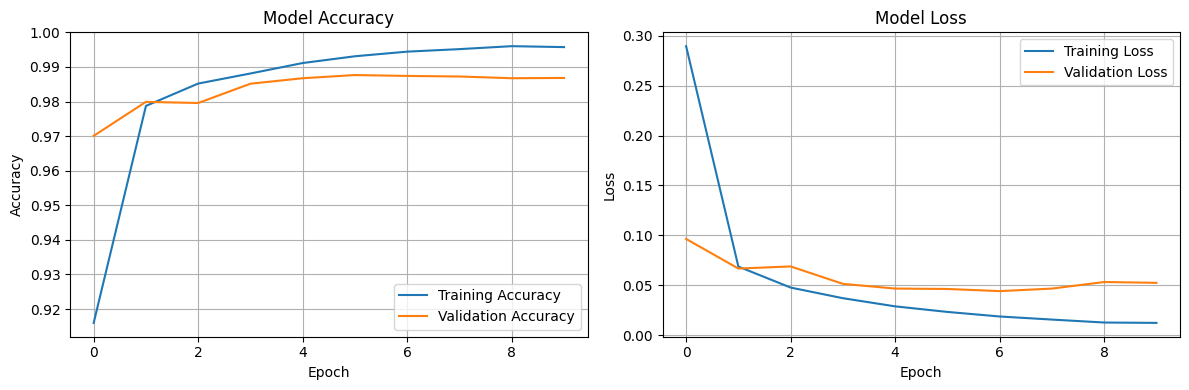

In [7]:
# Visualize training and validation loss and accuracy
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

## 6. Evaluate the Model

In [8]:
# Evaluate the trained model on testing dataset
def evaluate_model(model, x_test, y_test, y_test_cat):
    """
    Calculate accuracy, precision, recall, and F1-score
    """
    print("=== Model Evaluation ===")
    
    # Get predictions
    test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return y_pred_classes

# Evaluate the model
predictions = evaluate_model(model, x_test_processed, y_test, y_test_cat)

=== Model Evaluation ===
Test Loss: 0.0418
Test Accuracy: 0.9895
Precision: 0.9896
Recall: 0.9895
F1-Score: 0.9895


## 7. Experiment with Different Hyperparameters

In [9]:
# Experiment with different hyperparameters
def create_tuned_model(learning_rate=0.001):
    """
    Create a model with tunable learning rate
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Test different hyperparameters
hyperparameter_results = []

# Different learning rates and batch sizes
configs = [
    {'lr': 0.001, 'batch_size': 128},
    {'lr': 0.0005, 'batch_size': 128},
    {'lr': 0.001, 'batch_size': 64},
]

for i, config in enumerate(configs):
    print(f"\nExperiment {i+1}: Learning Rate={config['lr']}, Batch Size={config['batch_size']}")
    
    model_tuned = create_tuned_model(config['lr'])
    
    history_tuned = model_tuned.fit(
        x_train_final, y_train_final,
        batch_size=config['batch_size'],
        epochs=5,  # Reduced epochs for faster experimentation
        validation_data=(x_val, y_val),
        verbose=0
    )
    
    # Evaluate
    test_loss, test_accuracy = model_tuned.evaluate(x_test_processed, y_test_cat, verbose=0)
    
    hyperparameter_results.append({
        'config': config,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss
    })
    
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Display results
print("\n=== Hyperparameter Tuning Results ===")
for i, result in enumerate(hyperparameter_results):
    config = result['config']
    print(f"Experiment {i+1}: LR={config['lr']}, Batch Size={config['batch_size']}")
    print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"  Test Loss: {result['test_loss']:.4f}")


Experiment 1: Learning Rate=0.001, Batch Size=128
Test Accuracy: 0.9881

Experiment 2: Learning Rate=0.0005, Batch Size=128
Test Accuracy: 0.9866

Experiment 3: Learning Rate=0.001, Batch Size=64
Test Accuracy: 0.9882

=== Hyperparameter Tuning Results ===
Experiment 1: LR=0.001, Batch Size=128
  Test Accuracy: 0.9881
  Test Loss: 0.0335
Experiment 2: LR=0.0005, Batch Size=128
  Test Accuracy: 0.9866
  Test Loss: 0.0404
Experiment 3: LR=0.001, Batch Size=64
  Test Accuracy: 0.9882
  Test Loss: 0.0410


---

# Part 2: CIFAR-10 Dataset

Now implementing CNN for CIFAR-10 dataset (color images of objects)

## 1. Download and Preprocess CIFAR-10 Data

In [10]:
# Download CIFAR-10 dataset
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train_c10.shape}")
print(f"Training labels shape: {y_train_c10.shape}")
print(f"Test data shape: {x_test_c10.shape}")
print(f"Test labels shape: {y_test_c10.shape}")
print(f"Number of classes: {len(class_names)}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


In [11]:
# Preprocess CIFAR-10 data
x_train_c10 = x_train_c10.astype('float32') / 255.0
x_test_c10 = x_test_c10.astype('float32') / 255.0

# Convert labels to categorical
y_train_c10_cat = keras.utils.to_categorical(y_train_c10, 10)
y_test_c10_cat = keras.utils.to_categorical(y_test_c10, 10)

print(f"Processed training data shape: {x_train_c10.shape}")
print(f"Pixel value range: [{x_train_c10.min():.2f}, {x_train_c10.max():.2f}]")

Processed training data shape: (50000, 32, 32, 3)
Pixel value range: [0.00, 1.00]


In [12]:
# Split data into training and validation sets
x_train_c10_final, x_val_c10, y_train_c10_final, y_val_c10 = train_test_split(
    x_train_c10, y_train_c10_cat, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train_c10_cat.argmax(axis=1)
)

print(f"Final training set: {x_train_c10_final.shape}")
print(f"Validation set: {x_val_c10.shape}")
print(f"Test set: {x_test_c10.shape}")

Final training set: (40000, 32, 32, 3)
Validation set: (10000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


## 2. Implement CNN Model for CIFAR-10

In [13]:
def create_cifar10_cnn():
    """
    Create CNN model for CIFAR-10 (deeper architecture for color images)
    """
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        # Fully connected layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and display model
model_c10 = create_cifar10_cnn()
model_c10.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the CIFAR-10 Model

In [14]:
# Compile the model
model_c10.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Training CNN Model on CIFAR-10...")
history_c10 = model_c10.fit(
    x_train_c10_final, y_train_c10_final,
    batch_size=64,
    epochs=20,
    validation_data=(x_val_c10, y_val_c10),
    verbose=1
)

Training CNN Model on CIFAR-10...
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 104ms/step - accuracy: 0.3226 - loss: 1.8133 - val_accuracy: 0.4914 - val_loss: 1.3654
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.5116 - loss: 1.3471 - val_accuracy: 0.5984 - val_loss: 1.0995
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.5790 - loss: 1.1793 - val_accuracy: 0.6160 - val_loss: 1.0598
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 0.6183 - loss: 1.0792 - val_accuracy: 0.6617 - val_loss: 0.9284
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - accuracy: 0.6473 - loss: 0.9957 - val_accuracy: 0.6963 - val_loss: 0.8335
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.6712 - loss: 0.9326 - val_accuracy: 0.7176 - val_loss: 0.7832
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.6978 - loss: 0.8681 - val_accuracy: 0.7261 - val_loss: 0.7801
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 106ms

## 4. Monitor Training Process

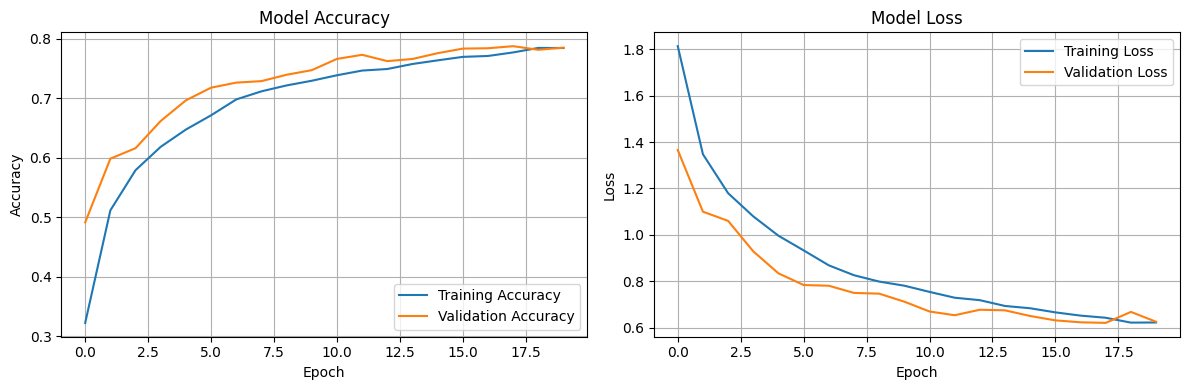

In [15]:
# Visualize training and validation loss and accuracy
plot_training_history(history_c10)

## 5. Evaluate the CIFAR-10 Model

In [16]:
# Evaluate the model
print("=== CIFAR-10 Model Evaluation ===")

# Get predictions
test_loss_c10, test_accuracy_c10 = model_c10.evaluate(x_test_c10, y_test_c10_cat, verbose=0)
y_pred_c10 = model_c10.predict(x_test_c10, verbose=0)
y_pred_c10_classes = np.argmax(y_pred_c10, axis=1)

# Calculate metrics
accuracy_c10 = accuracy_score(y_test_c10, y_pred_c10_classes)
precision_c10 = precision_score(y_test_c10, y_pred_c10_classes, average='weighted')
recall_c10 = recall_score(y_test_c10, y_pred_c10_classes, average='weighted')
f1_c10 = f1_score(y_test_c10, y_pred_c10_classes, average='weighted')

print(f"Test Loss: {test_loss_c10:.4f}")
print(f"Test Accuracy: {test_accuracy_c10:.4f}")
print(f"Precision: {precision_c10:.4f}")
print(f"Recall: {recall_c10:.4f}")
print(f"F1-Score: {f1_c10:.4f}")

=== CIFAR-10 Model Evaluation ===
Test Loss: 0.6398
Test Accuracy: 0.7875
Precision: 0.7920
Recall: 0.7875
F1-Score: 0.7861


## 6. Experiment with Different Hyperparameters

In [17]:
# Experiment with different hyperparameters for CIFAR-10
def create_tuned_cifar10_model(learning_rate=0.001):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Test different hyperparameters
hyperparameter_results_c10 = []

configs_c10 = [
    {'lr': 0.001, 'batch_size': 64},
    {'lr': 0.0005, 'batch_size': 64},
    {'lr': 0.001, 'batch_size': 32},
]

for i, config in enumerate(configs_c10):
    print(f"\nExperiment {i+1}: Learning Rate={config['lr']}, Batch Size={config['batch_size']}")
    
    model_tuned_c10 = create_tuned_cifar10_model(config['lr'])
    
    history_tuned_c10 = model_tuned_c10.fit(
        x_train_c10_final, y_train_c10_final,
        batch_size=config['batch_size'],
        epochs=10,
        validation_data=(x_val_c10, y_val_c10),
        verbose=0
    )
    
    # Evaluate
    test_loss, test_accuracy = model_tuned_c10.evaluate(x_test_c10, y_test_c10_cat, verbose=0)
    
    hyperparameter_results_c10.append({
        'config': config,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss
    })
    
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Display results
print("\n=== CIFAR-10 Hyperparameter Tuning Results ===")
for i, result in enumerate(hyperparameter_results_c10):
    config = result['config']
    print(f"Experiment {i+1}: LR={config['lr']}, Batch Size={config['batch_size']}")
    print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"  Test Loss: {result['test_loss']:.4f}")


Experiment 1: Learning Rate=0.001, Batch Size=64
Test Accuracy: 0.7481

Experiment 2: Learning Rate=0.0005, Batch Size=64
Test Accuracy: 0.7626

Experiment 3: Learning Rate=0.001, Batch Size=32
Test Accuracy: 0.7421

=== CIFAR-10 Hyperparameter Tuning Results ===
Experiment 1: LR=0.001, Batch Size=64
  Test Accuracy: 0.7481
  Test Loss: 0.7355
Experiment 2: LR=0.0005, Batch Size=64
  Test Accuracy: 0.7626
  Test Loss: 0.6903
Experiment 3: LR=0.001, Batch Size=32
  Test Accuracy: 0.7421
  Test Loss: 0.7708
